**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Bonus](#toc1_)    
  - [Before Starting](#toc1_1_)    
  - [**1. Large Language Models (LLMs)** - Expanded explanation](#toc1_2_)    
    - [Programmatic Access vs. Web Interfaces:](#toc1_2_1_)    
    - [Optional Notebook Material for Exploration - Open Source LLMs:](#toc1_2_2_)    
      - [Parameters and Quantization](#toc1_2_2_1_)    
    - [Proprietary LLMs: The Gemini API](#toc1_2_3_)    
    - [Interacting with the Gemini API](#toc1_2_4_)    
    - [**1.1 Multi-Modal Prompting**](#toc1_2_5_)    
      - [**1.1.1 Text + Images**](#toc1_2_5_1_)    
        - [**1.1.1.1 Basic Image Understanding**](#toc1_2_5_1_1_)    
        - [**>>> Bonus 1 (Take home):**](#toc1_2_5_1_2_)    
        - [**1.1.1.2 Segmentation**](#toc1_2_5_1_3_)    
        - [**>>> Bonus 2 (Take home):**](#toc1_2_5_1_4_)    
      - [**1.1.2 Text + Video**](#toc1_2_5_2_)    
        - [**1.1.2.1 Uploading local video:**](#toc1_2_5_2_1_)    
        - [**1.1.2.2 Using YouTube video:**](#toc1_2_5_2_2_)    
      - [**1.1.3 Text + Audio**](#toc1_2_5_3_)    
        - [**>>> Bonus 3 (Take home):**](#toc1_2_5_3_1_)    
    - [**1.2 Tool Calling:**](#toc1_2_6_)    
      - [General Idea](#toc1_2_6_1_)    
        - [**>>> Bonus 4 (Take home):**](#toc1_2_6_1_1_)    
    - [**1.3 Information Extraction and Grounding:** - Expanded explanation](#toc1_2_7_)    
      - [**`langextract`: A Library for Grounded Extraction**](#toc1_2_7_1_)    
        - [**1.3.1 Using a video from youtube:**](#toc1_2_7_1_1_)    
        - [**>>> Bonus 5 (Take home):**](#toc1_2_7_1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Bonus](#toc0_)
This is the bonus points' section for lab 2 phase 2.


## <a id='toc1_1_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_2_'></a>[**1. Large Language Models (LLMs)** - Expanded explanation](#toc0_)

Before we start we strongly suggest that you watch the following video explanations so you can understand the concepts that we are gonna discuss about extra LLMs concepts: 

1. [What Are Vision Language Models? How AI Sees & Understands Images](https://www.youtube.com/watch?v=lOD_EE96jhM)
2. [How do Multimodal AI models work? Simple explanation](https://www.youtube.com/watch?v=WkoytlA3MoQ)
3. [Multi-Modal LLMs for Image, Sound and Video](https://www.youtube.com/watch?v=_sGwL6RAsUc&t=1137s)
4. [What is Tool Calling? Connecting LLMs to Your Data](https://www.youtube.com/watch?v=h8gMhXYAv1k)

`These videos can help you get a better grasp on these additional concepts of LLMs covered in the bonus if you were not familiar before.`

**So now let's start with the bonus content of Lab 2 Phase 2.**

Large Language Models (LLMs) are AI models trained on vast text data to understand and generate human language. Models like GPT and BERT excel at tasks like translation, summarization, and sentiment analysis due to their deep learning techniques and large-scale training. Recently these models got popular with the rise of Open-AI's ChatGPT and their different models, showcasing the potential of these models in a lot of aspects of our current society.

Open-source LLMs are cost-effective and customizable, with strong community support, but may underperform compared to proprietary models (Gemini, ChatGPT, Claude, etc.) and require technical expertise to manage. Proprietary LLMs offer superior performance, ease of use, and regular updates, but can be costly, less flexible, and create dependency on external providers for ongoing access and updates.

Of course. Here is a revised version that frames the explanation objectively, focusing on the practical advantages for a student working on data mining exercises and projects.

### <a id='toc1_2_1_'></a>[Programmatic Access vs. Web Interfaces:](#toc0_)

For this data mining lab, we will interact with LLMs using code (programmatic access) rather than a web-based chatbot. This approach provides several direct advantages for completing your exercises and projects:

*   **Process Datasets Automatically**: Instead of manually copying and pasting individual data points, you can use a simple `for` loop in your code to send every row of a dataset to the model. This allows you to perform tasks like sentiment analysis or data extraction on hundreds or thousands of records efficiently.

*   **Get Structured, Usable Output**: A chatbot provides conversational text that is difficult to use in analysis. With an API, you can command the model to return its output in a specific **JSON format**. This structured data can be directly and reliably loaded into a **pandas DataFrame**, allowing you to immediately continue with your data analysis and visualization tasks.

*   **Ensure Consistent and Reproducible Results**: Scientific and data mining work must be reproducible. By setting parameters like `temperature=0.0` in your code, you make the model's output deterministic. This means you will get the exact same result every time you run your script with the same input, which is essential for debugging your code and validating your findings.

*   **Maintain Data Privacy**: If you work with sensitive or private datasets for a project, uploading that data to a public web interface is not secure. Using an API provides better data governance, and running a model locally with a tool like Ollama ensures your data **never leaves your computer**.

### <a id='toc1_2_2_'></a>[Optional Notebook Material for Exploration - Open Source LLMs:](#toc0_)

For students interested in running models locally, the optional notebook `DM2025-Lab2-Optional-Ollama.ipynb` explores using Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)). Ollama is a powerful library that simplifies running a wide range of open-source LLMs. In that notebook, we will use the **Gemma 3 (4B)** for multi-modal tasks and advanced text-based tasks, **Gemma 3 (270M version)** for simple text-based tasks, **Llama 3.2 (1B version)** for tool calling tasks, and **embedding-gemma (300M params)** to generate embeddings from text data. The Gemma models come from Google's family of models, while Llama 3.2 comes from Meta's family, all of them open source.

To use these models effectively, an **NVIDIA GPU with at least 4 GB of VRAM is recommended**. If you don't have the required hardware, you can run the examples in Kaggle or other cloud notebooks with their free GPU usage tiers activated.

You can explore the variety of models available through Ollama here:

![pic10.png](./pics/pic10.png)

#### <a id='toc1_2_2_1_'></a>[Parameters and Quantization](#toc0_)

In the image, you'll notice that models have a certain number of **parameters**. These are the internal variables the model learns during training, which store its knowledge. A higher parameter count generally leads to a more capable model but also increases its size and the computational resources needed to run it, especially VRAM.

This is where **quantization** becomes crucial. Quantization is a technique to reduce the memory footprint of a model by converting its parameters from high-precision data types (like 32-bit floating-point numbers) to lower-precision ones (like 8-bit integers). This process makes the model smaller and faster, significantly lowering VRAM usage, though it can sometimes cause a minor reduction in accuracy. Thanks to quantization, a 4-billion parameter model like Gemma 3 4B can be run on consumer-grade GPUs more efficiently.

### <a id='toc1_2_3_'></a>[Proprietary LLMs: The Gemini API](#toc0_)

For the main exercises in this lab, we will use **the Gemini API**. This approach offers several advantages over running local open-source models, such as access to state-of-the-art model performance without needing specialized hardware. While the API has usage limits (rate limits and token quotas), it provides a generous **free tier** that is more than sufficient for our exercises.

![pic13.png](./pics/pic13.png)

![pic14.png](./pics/pic14.png)

We will primarily use the **Gemini 2.5 Flash-Lite** (`gemini-2.5-flash-lite`) model. As shown in the rate limit table, this model is optimized for high-frequency tasks and offers a high request-per-day limit of 1,000, making it ideal for completing the lab exercises without interruption.

Students are encouraged to explore other models available through the API but should remain mindful of their respective usage limits. For instance:
*   **Gemini 2.5 Pro** is a more powerful model but has a lower daily request limit of 100.
*   The **Gemma 3** model available via the API offers an impressive 14,400 requests per day, providing another excellent alternative for experimentation.

Please be aware of your usage limits as you work through the exercises to ensure you do not get rate-limited.

[Gemini Documentation](https://ai.google.dev/gemini-api/docs)

[Gemini Rate Limits](https://ai.google.dev/gemini-api/docs/rate-limits)

[Description of Gemini Models](https://ai.google.dev/gemini-api/docs/models)

---

### <a id='toc1_2_4_'></a>[Interacting with the Gemini API](#toc0_)

The code cell below contains the primary function, `prompt_gemini`, that we will use throughout this lab to communicate with the Gemini API. It's designed to be a flexible wrapper that handles the details of sending a request and receiving a response.

Before you run the exercises, here are the key things you need to understand in this setup:

*   **API Key Configuration**: The script loads your API key from a `.env` file located in the `./config/` directory. **You must create this file and add your API key** like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`. This is a security best practice to keep your credentials out of the code.

*   **Global Settings**: At the top of the script, you can find and modify several important defaults:
    *   `MODEL_NAME`: We've set this to `"gemini-2.5-flash-lite"`, but you can easily switch to other models like `"gemini-2.5-pro"` to experiment.
    *   `SYSTEM_INSTRUCTION`: This sets the model's default behavior or persona (e.g., "You are a helpful assistant"). You can customize this for different tasks.
    *   `SAFETY_SETTINGS`: For our academic exercises, these are turned off to prevent interference. In real-world applications, you would configure these carefully.

*   **The `prompt_gemini` function**: This is the main tool you will use. Here are its most important parameters:
    *   `input_prompt`: The list of contents (text, images, etc.) you want to send to the model.
    *   `temperature`: Controls the randomness of the output. `0.0` makes the output deterministic and less creative, while a higher value (e.g., `0.7`) makes it more varied.
    *   `schema`: A powerful feature that allows you to specify a JSON format for the model's output. This is extremely useful for structured data extraction.
    *   `with_tokens_info`: If set to `True`, the function will also return the number of input and output tokens used, which is helpful for monitoring your usage against the free tier limits.

In the following exercises, you will call this function with different prompts and configurations to solve various tasks.

If needed, you can also check some tutorials on how a python function works: [Python Functions Tutorial](https://realpython.com/defining-your-own-python-function/)

In [1]:
import os
from dotenv import load_dotenv
from google import genai
from google.genai import types

env_path = "./config/.env"
load_dotenv(dotenv_path=env_path)

# System instruction that can dictate how the model behaves in the output, can be customized as needed
SYSTEM_INSTRUCTION = (
        "You are a helpful assistant"
    )

# Max amount of tokens that the model can output, the Gemini 2.5 Models have this maximum amount
# For other models need to check their documentation 
MAX_OUTPUT_TOKENS = 65535
MODEL_NAME = "gemini-2.5-flash-lite" # Other models: "gemini-2.5-pro", "gemini-2.5-flash"; Check different max output tokens: "gemini-2.0-flash" , "gemini-2.0-flash-lite" 

# We disable the safety settings, as no moderation is needed in our tasks
SAFETY_SETTINGS = [
    types.SafetySetting(
        category="HARM_CATEGORY_HATE_SPEECH", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_SEXUALLY_EXPLICIT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_HARASSMENT", threshold="OFF")
]

# We input the API Key to be able to use the Gemini models
api_key = os.getenv("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = api_key
client = genai.Client(api_key=api_key)

# We also set LangExtract to use the API key as well:
if 'GEMINI_API_KEY' not in os.environ:
    os.environ['GEMINI_API_KEY'] = api_key

def prompt_gemini(
        input_prompt: list,
        schema = None,
        temperature: float = 0.0,
        system_instruction: str = SYSTEM_INSTRUCTION,
        max_output_tokens: int = MAX_OUTPUT_TOKENS,
        client: genai.Client = client,
        model_name: str = MODEL_NAME,
        new_config: types.GenerateContentConfig = None,
        with_tools: bool = False,
        with_parts: bool = False,
        with_tokens_info: bool = False
    ):
        try:
            # If we need a JSON schema we set up the following
            if schema:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    response_mime_type="application/json",
                    response_schema=schema,
                    safety_settings=SAFETY_SETTINGS
                )
            # If there is no need we leave it unstructured
            else:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    safety_settings=SAFETY_SETTINGS
                )
            
            # We add a different custom configuration if we need it
            if new_config:
                generate_content_config = new_config
            
            # For some tasks we need a more specific way to add the contents when prompting the model
            # So we need custom parts for it sometimes from the "types" objects
            if with_parts:
                response = client.models.generate_content(
                    model=model_name,
                    contents=types.Content(parts=input_prompt),
                    config=generate_content_config,
                )
            # In the simplest form the contents can be expressed as a list [] of simple objects like str and Pillow images
            else:
                response = client.models.generate_content(
                    model=model_name,
                    contents=input_prompt,
                    config=generate_content_config,
                )

            if with_tools:
                # print(response)
                # Include raw response when function calling
                completion = response
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    return completion, log
                return completion
            else:
                completion = response.text
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    # Return the text response and logs (if selected)
                    return completion, log
                return completion
        except Exception as e:
             print(f"Error occurred when generating response, error: {e}")
             return None

---
### <a id='toc1_2_5_'></a>[**1.1 Multi-Modal Prompting**](#toc0_)

Multi-modal prompting involves using input from multiple sources or modes, such as text, images, video or audio, to guide a model's response. It allows AI to process and generate information based on more than one type of input.

---
#### <a id='toc1_2_5_1_'></a>[**1.1.1 Text + Images**](#toc0_)

Gemini's multimodal capabilities allow it to perform sophisticated **image understanding**, turning unstructured visual data into analyzable information. Beyond basic tasks like captioning or answering questions about an image's content, it offers powerful features for data extraction:

*   **Object Detection**: The model can identify objects and return their **bounding box coordinates**, providing structured location data.
*   **Image Segmentation**: It can go a step further by providing a precise pixel-level **segmentation mask**, outlining the exact shape of detected objects.

You can provide single or multiple images by either **uploading a file** (for large images or reuse) or passing the image data **inline** within your API request.

We are going to explore how to prompt our model for basic image understanding and how to use the Gemini's segmentation capabilities.

For more information you can visit the following link: [Gemini's Image Understanding Documentation](https://ai.google.dev/gemini-api/docs/image-understanding)

---
##### <a id='toc1_2_5_1_1_'></a>[**1.1.1.1 Basic Image Understanding**](#toc0_)

For basic image understanding, the model receives both an image and a related text prompt. The image provides visual context, while the text gives additional guidance. The model uses both inputs to generate more accurate and contextually relevant responses, which is useful for tasks like image captioning, visual question answering, or content generation based on visual cues.

Let's look at the following images that are in the `pics` folder in the directory of this notebook:

![example1.png](./pics/example1.png)

source: https://cooljapan-videos.com/tw/articles/epe0y86g

![example2.jpg](./pics/example2.jpg)

source: https://www.istockphoto.com/photo/young-cat-scottish-straight-gm1098182434-294927481

We will use our selected Gemini model to request a description of the images:

In [7]:
from PIL import Image
from IPython.display import display, Markdown

image_example_1 = Image.open('./pics/example1.png')

input_prompt_img = ["What is this image about?", image_example_1]
text_response_1, logs_1 = prompt_gemini(input_prompt = input_prompt_img, with_tokens_info = True)
display(Markdown(text_response_1))

The image is about a Shiba Inu dog running joyfully across a grassy field. The dog is captured mid-air, with its mouth open in a happy expression and its tail curled over its back. The background is blurred, suggesting motion and focusing attention on the energetic dog.

In [8]:
print(logs_1)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 271, 'output_tokens': 55}


In [9]:
from PIL import Image

image_example_2 = Image.open('./pics/example2.jpg')

input_prompt_img_2 = ["What is this image about?", image_example_2]
text_response_2, logs_2 = prompt_gemini(input_prompt = input_prompt_img_2, with_tokens_info = True)
display(Markdown(text_response_2))

The image is about a tabby cat standing on a white background. The cat is facing the camera with its tail held high. It has a striped coat and yellow eyes.

In [10]:
print(logs_2)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 271, 'output_tokens': 34}


---
##### <a id='toc1_2_5_1_2_'></a>[**>>> Bonus 1 (Take home):**](#toc0_)

Try asking the model with one image of your choosing. Is the description accurate? Why?

In [11]:
# Answer here


---
##### <a id='toc1_2_5_1_3_'></a>[**1.1.1.2 Segmentation**](#toc0_)

Beyond simply detecting objects, we can prompt Gemini to perform **image segmentation**, which involves predicting the precise pixel-level contour or "mask" for each object. [Gemini's Segmentation Documentation](https://ai.google.dev/gemini-api/docs/image-understanding#segmentation)

To understand this process, it's helpful to remember how computer vision models "see" images. A model doesn't perceive a picture; it sees a grid of numbers (pixels). Traditional segmentation models are trained specifically to classify every single pixel in this grid, assigning it to a class (e.g., "cat," "dog," "background"). This usually requires a highly specialized model trained on vast, manually labeled datasets.

Gemini offers a powerful alternative, performing this complex task without needing a specialized model. Its output, however, reflects these underlying computer vision principles. When asked to segment an image, Gemini returns a structured JSON list. For each detected object, it provides:

*   **`"box_2d"`**: A bounding box with normalized coordinates `[y0, x0, y1, x1]`. Normalizing coordinates (scaling them to a standard range like 0-1000) is a common preprocessing step in machine learning that makes calculations consistent regardless of the original image size. Our code will need to "de-normalize" these coordinates back to the image's actual pixel dimensions.
*   **`"label"`**: A text label identifying the object.
*   **`"mask"`**: The segmentation mask itself, provided as a **base64 encoded PNG**. This encoding is a standard way to represent binary image data as a text string within a JSON response. The mask is not a simple binary outline but a **probability map**, where each pixel's brightness (0-255) represents the model's confidence that it belongs to the object.

Therefore, to visualize the result, our code must perform a few key post-processing steps: decode the base64 string back into an image, resize this small mask to fit the dimensions of its bounding box, and finally, apply a confidence threshold (e.g., any pixel value > 127) to create the final binary mask.

If you are interested in the topic you can check these extra tutorials on image classification and segmentation: 

[PyTorch Image Classification](https://github.com/bentrevett/pytorch-image-classification)

[Train your image classifier model with PyTorch](https://learn.microsoft.com/en-us/windows/ai/windows-ml/tutorials/pytorch-train-model)

[Python | Image Classification using Keras](https://www.geeksforgeeks.org/machine-learning/python-image-classification-using-keras/)

[Image Segmentation using Python's scikit-image module](https://www.geeksforgeeks.org/machine-learning/image-segmentation-using-pythons-scikit-image-module/)

[Mediapipe | Image segmentation guide for Python](https://ai.google.dev/edge/mediapipe/solutions/vision/image_segmenter/python)

**We are going to utilize the following image:**

![example3.jpg](./pics/example3.jpg)

source: https://www.pexels.com/photo/a-black-dog-and-orange-tabby-cat-fighting-on-the-road-10140894/

In [12]:
from PIL import Image, ImageDraw
import io
import base64
import json
import numpy as np
import os
from pydantic import BaseModel
from google.genai import types
import random

# Schema for each element that is found inside the image
class Element(BaseModel):
   label:str
   box_2d: str
   mask: str

def parse_json(json_output: str):
  # Parsing out the markdown fencing
  # Just as a double validation measure
  lines = json_output.splitlines()
  for i, line in enumerate(lines):
    if line == "```json":
      json_output = "\n".join(lines[i+1:])  # Remove everything before "```json"
      json_output = json_output.split("```")[0]  # Remove everything after the closing "```"
      break  # Exit the loop once "```json" is found
  return json_output

def extract_segmentation_masks(image_path: str, items_to_detect: str, schema, model_name: str = "gemini-2.5-flash-lite", output_dir: str = "segmentation_outputs"):
  # Colors to draw the bounding boxes, masks and labels
  HIGH_CONTRAST_COLORS = [
      (255, 0, 0),      # Red
      (0, 255, 0),      # Lime
      (0, 0, 255),      # Blue
      (255, 255, 0),    # Yellow
      (0, 255, 255),    # Cyan
      (255, 0, 255),    # Magenta
      (255, 165, 0),    # Orange
      (0, 128, 128),    # Teal
      (128, 0, 128),    # Purple
      (255, 192, 203),  # Pink
      (0, 250, 154),    # Medium Spring Green
      (255, 215, 0),    # Gold
  ]
  # Load and resize image
  im = Image.open(image_path)
  im.thumbnail([1024, 1024], Image.Resampling.LANCZOS)

  prompt = f"""
  Give the segmentation masks for the {items_to_detect}.
  Output a JSON list of segmentation masks where each entry contains the 2D
  bounding box in the key "box_2d", the segmentation mask in key "mask", and
  the text label in the key "label". Use descriptive labels.
  """
  config = types.GenerateContentConfig(
    response_mime_type="application/json",
    thinking_config=types.ThinkingConfig(thinking_budget=0) # set thinking_budget to 0 for better results in object detection
  )
  input_prompt = [prompt, im]
  response = prompt_gemini(input_prompt = input_prompt, model_name = model_name, schema=schema, new_config=config)
  print(f"response: {response}")
  # Parse JSON response
  items = json.loads(parse_json(response))

  # Create output directory
  os.makedirs(output_dir, exist_ok=True)

  # Create a copy of the original image to draw all results on
  final_result_image = im.convert("RGBA")

  # Process each mask
  for i, item in enumerate(items):
      # Get bounding box coordinates
      box = item["box_2d"]
      y0 = int(box[0] / 1000 * im.size[1])
      x0 = int(box[1] / 1000 * im.size[0])
      y1 = int(box[2] / 1000 * im.size[1])
      x1 = int(box[3] / 1000 * im.size[0])

      # Skip invalid boxes
      if y0 >= y1 or x0 >= x1:
          continue

      # Process mask
      png_str = item["mask"]
      if not png_str.startswith("data:image/png;base64,"):
          continue

      # Remove prefix
      png_str = png_str.removeprefix("data:image/png;base64,")
      mask_data = base64.b64decode(png_str)
      mask = Image.open(io.BytesIO(mask_data))

      # Resize mask to match bounding box
      mask = mask.resize((x1 - x0, y1 - y0), Image.Resampling.BILINEAR)

      # Convert mask to numpy array for processing
      mask_array = np.array(mask)

      # Generate a random color for the current item
      random_color = random.choice(HIGH_CONTRAST_COLORS)

      # Create a new transparent image to draw the colored mask on
      mask_overlay = Image.new('RGBA', final_result_image.size, (0, 0, 0, 0))
      mask_draw = ImageDraw.Draw(mask_overlay)

      # Draw the mask pixels onto the transparent overlay with the random color
      # The alpha channel (transparency) is set to 150 (out of 255)
      for y in range(y1 - y0):
          for x in range(x1 - x0):
              if mask_array[y, x] > 128:  # Threshold for mask
                  mask_draw.point((x + x0, y + y0), fill=(*random_color, 150))

      # Composite the colored mask onto the final result image
      final_result_image = Image.alpha_composite(final_result_image, mask_overlay)

      # Create a new draw object to draw the box and label on the updated image
      final_draw = ImageDraw.Draw(final_result_image)

      # Draw the bounding box
      final_draw.rectangle([x0, y0, x1, y1], outline=random_color, width=3)

      # Draw the label text
      final_draw.text((x0, y0 - 15), item['label'], fill=random_color)

      # Create overlay for this mask
      overlay = Image.new('RGBA', im.size, (0, 0, 0, 0))
      overlay_draw = ImageDraw.Draw(overlay)

      # Create overlay for the mask
      color = (255, 255, 255, 200)
      for y in range(y0, y1):
          for x in range(x0, x1):
              if mask_array[y - y0, x - x0] > 128:  # Threshold for mask
                  overlay_draw.point((x, y), fill=color)

      # Save individual mask and its overlay
      mask_filename = f"{item['label']}_{i}_mask.png"
      overlay_filename = f"{item['label']}_{i}_overlay.png"

      mask.save(os.path.join(output_dir, mask_filename))

      # Create and save overlay
      composite = Image.alpha_composite(im.convert('RGBA'), overlay)
      composite.save(os.path.join(output_dir, overlay_filename))
      print(f"Saved mask and overlay for {item['label']} to {output_dir}")
  
  # Save final result image
  final_image_path = os.path.join(output_dir, f"final_result_{items_to_detect}.png")
  final_result_image.save(final_image_path)
  print(f"\nSaved final integrated result to {final_image_path}")

response: [
  {"box_2d": [532, 424, 770, 688], "mask": "", "label": "a ginger cat"},
  {"box_2d": [653, 448, 933, 722], "mask": "", "label": "a black dog"}
]
Saved mask and overlay for a ginger cat to segmentation_outputs
Saved mask and overlay for a black dog to segmentation_outputs

Saved final integrated result to segmentation_outputs\final_result_Animals.png

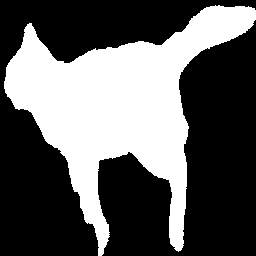
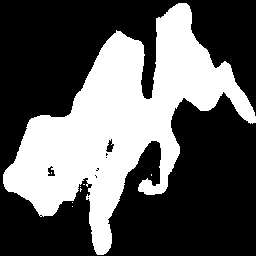

In [13]:
image_example_3 = "./pics/example3.jpg"
items_to_detect = "Animals"
extract_segmentation_masks(image_example_3, items_to_detect, schema=list[Element])

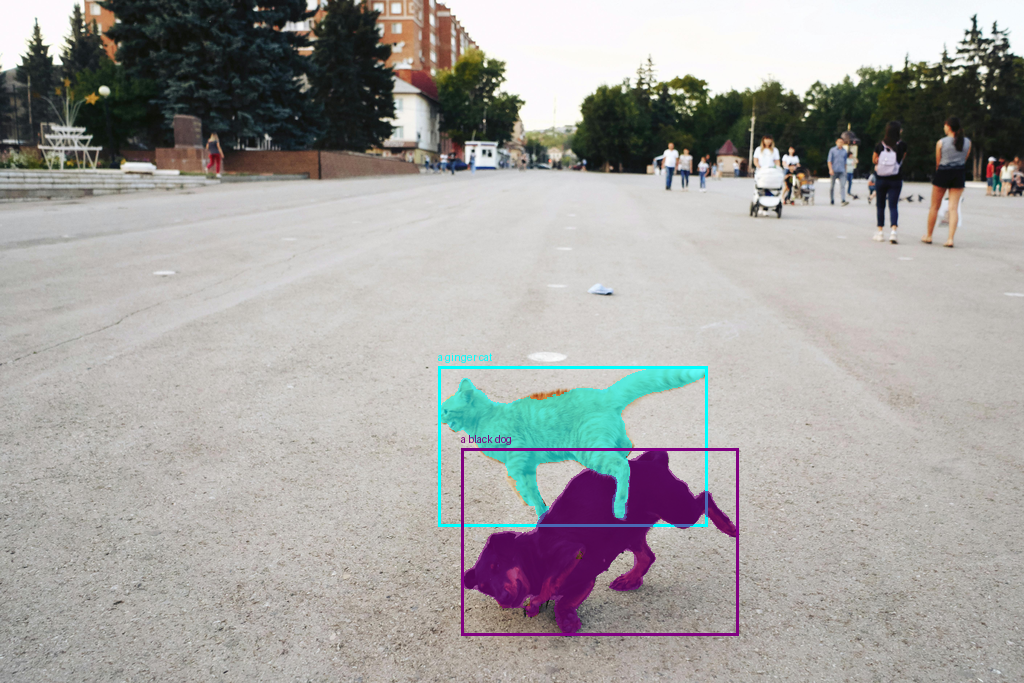

In [14]:
from IPython.display import Image as IMG
IMG(filename='./results/segmentation_outputs/final_result_Animals.png')

response: [
  {"box_2d": [197, 198, 263, 215], "mask": "", "label": "People"},
  {"box_2d": [200, 735, 317, 764], "mask": "", "label": "People"},
  {"box_2d": [207, 762, 293, 778], "mask": "", "label": "People"},
  {"box_2d": [210, 647, 282, 664], "mask": "", "label": "People"},
  {"box_2d": [210, 661, 282, 677], "mask": "", "label": "People"},
  {"box_2d": [203, 807, 303, 838], "mask": "", "label": "People"},
  {"box_2d": [200, 850, 354, 883], "mask": "", "label": "People"},
  {"box_2d": [190, 900, 362, 944], "mask": "", "label": "People"},
  {"box_2d": [200, 735, 310, 764], "mask": "", "label": "People"},
  {"box_2d": [217, 679, 275, 695], "mask": "", "label": "People"},
  {"box_2d": [227, 973, 293, 996], "mask": "", "label": "People"},
  {"box_2d": [223, 961, 287, 976], "mask": "", "label": "People"}
]
Saved mask and overlay for People to segmentation_outputs
Saved mask and overlay for People to segmentation_outputs
Saved mask and overlay for People to segmentation_outputs
Saved mas
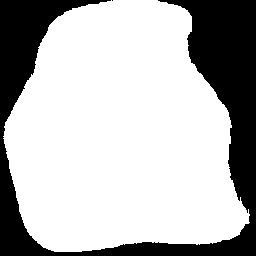
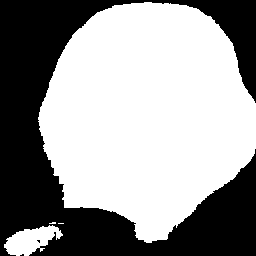
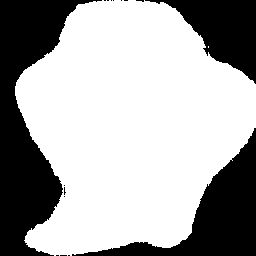
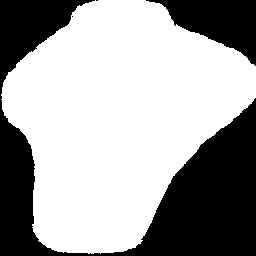
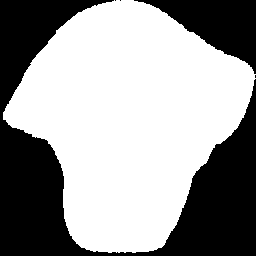
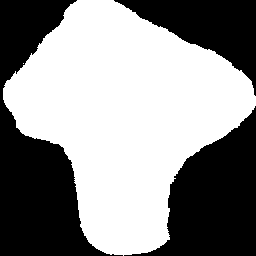
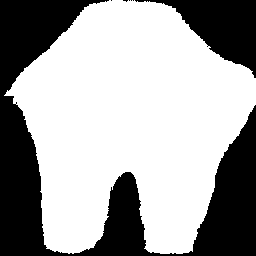
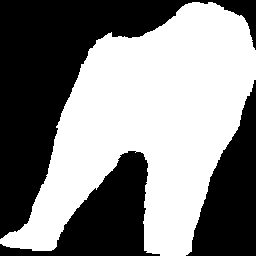
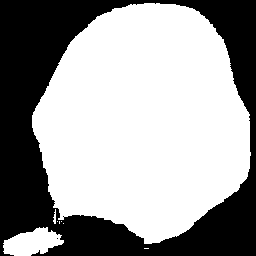
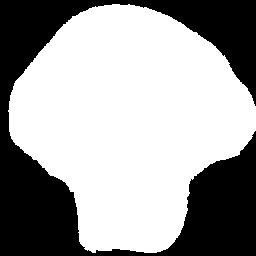
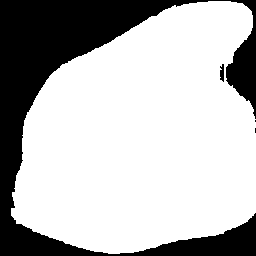
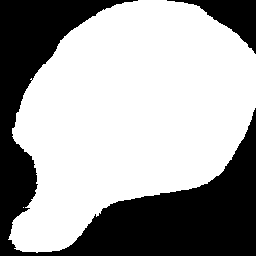

In [15]:
items_to_detect_2 = "People"
extract_segmentation_masks(image_example_3, items_to_detect_2, schema=list[Element])

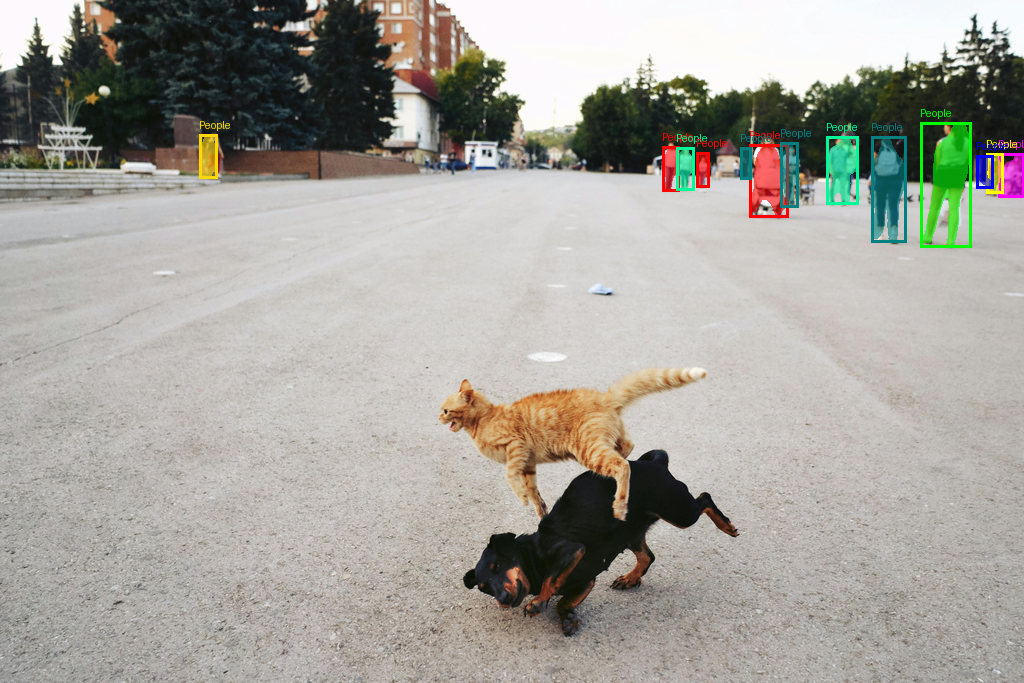

In [16]:
from IPython.display import Image as IMG
IMG(filename='./results/segmentation_outputs/final_result_People.png')

---
##### <a id='toc1_2_5_1_4_'></a>[**>>> Bonus 2 (Take home):**](#toc0_)

Try asking the model with `another image` of your choosing with `different types of elements`, prompt the model to make the segmentation on one type of element. Try again with a `stronger Gemini model`. **Discuss and compare** the results from both models.

In [17]:
# Answer here


---
#### <a id='toc1_2_5_2_'></a>[**1.1.2 Text + Video**](#toc0_)

Modern LLMs like Gemini are multimodal, meaning they can analyze **video content** to extract information, generate summaries, and answer specific questions. This capability turns unstructured video into a source of analyzable data, which is highly valuable for data mining tasks.

Gemini processes video by analyzing both its **visual track** (by sampling frames at one frame-per-second by default) and its **audio track** simultaneously.

We are going to explore how to process local video files and YouTube URLs, and how to do timestamp queries and video clipping, although this last one will be discussed in section `10.5 Information Extraction and Grounding`.

**Important Note on Token Usage:** Be aware that video processing is extremely **token-intensive**, consuming hundreds of tokens for every second of video. Use features like clipping and short video clips to manage your usage effectively, especially on the free tier.

[Gemini's Video Understanding Documentation](https://ai.google.dev/gemini-api/docs/video-understanding)

---
##### <a id='toc1_2_5_2_1_'></a>[**1.1.2.1 Uploading local video:**](#toc0_)

[Upload a video file - documentation](https://ai.google.dev/gemini-api/docs/video-understanding#upload-video)

In [18]:
import time

# Function that checks the status of our uploaded file, if it is ready to be used in the prompt
def wait_until_file_is_active(client, uploaded_file, timeout=60):
    wait_time = 0
    while wait_time < timeout:
        file_status = client.files.get(name=uploaded_file.name)
        if file_status.state == "ACTIVE":
            return file_status
        print(f"Waiting for file {file_status.name} to become ACTIVE (currently {file_status.state})...")
        time.sleep(2)
        wait_time += 2
    raise TimeoutError(f"File {uploaded_file.name} did not become ACTIVE within {timeout} seconds.")

In [19]:
from IPython.display import display, Markdown

# The next video was downloaded from this youtube link: https://www.youtube.com/watch?v=oKvVaOvyKPg
# It's under the Creative Commons License, free to use 
example_video = client.files.upload(file="./videos/video_example.mp4")
wait_until_file_is_active(client, example_video)

input_prompt = [example_video, "Make a summary of everything said and happening in the video, and make a transcript verbatim of everything said in it."]
text_response_video, logs_video = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)

# We can observe how the input tokens grew bigger in usage
# By default Gemini uses 1 fps in medium definition for the media, but to save more on token usage we can set 0.1 fps and low definition
# We explore this in section 10.5 of this notebook
print(logs_video)
display(Markdown(text_response_video))

Waiting for file files/mlfm46a3kg8q to become ACTIVE (currently FileState.PROCESSING)...
Waiting for file files/mlfm46a3kg8q to become ACTIVE (currently FileState.PROCESSING)...
Waiting for file files/mlfm46a3kg8q to become ACTIVE (currently FileState.PROCESSING)...
Waiting for file files/mlfm46a3kg8q to become ACTIVE (currently FileState.PROCESSING)...
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 55195, 'output_tokens': 1072}


The video tells the story of Anya, a timid and introverted girl who struggles to find her voice. She spends her days lost in books, feeling isolated and alone. However, when she joins an after-school drama club, she begins to discover her confidence. Through acting and collaborating with others, Anya learns to project her voice, find her stage presence, and express herself fully. The drama club becomes a transformative experience, helping her to overcome her shyness and build meaningful connections. The video concludes with Anya realizing that even the most introverted individuals can find their voice and create a life filled with friendship and purpose.

**Transcript:**

(00:00) ANYA FINDS HER VOICE
(00:03) IN THE BUSTLING HALLWAYS OF WILLOW CREEK ELEMENTARY, THERE LIVED ANYA, A TIMID AND INTROVERTED LITTLE GIRL.
(00:10) HER DELICATE FRAME AND SOFT VOICE MADE HER BLEND SEAMLESSLY INTO THE BACKGROUND, OFTEN UNNOTICED BY HER PEERS.
(00:19) ANYA'S WHISPERED WORDS STUMBLED AND FADED BEFORE REACHING THEIR INTENDED EARS, LEAVING HER FEELING ISOLATED AND ALONE.
(00:27) YEARNING FOR COMPANIONSHIP, ANYA SPENT HER DAYS LOST IN BOOKS, FINDING SOLACE IN THE WRITTEN WORD.
(00:34) HOWEVER, WHEN IT CAME TO SOCIAL INTERACTIONS, SHE FROZE, HER MIND RACING WITH DOUBTS AND ANXIETIES.
(00:42) THE THOUGHT OF SPEAKING UP IN CLASS FILLED HER WITH AN OVERWHELMING DREAD.
(00:48) ONE ORDINARY AFTERNOON, AS ANYA SAT ALONE ON THE PLAYGROUND SWING, HER GAZE FELL UPON A GROUP OF CHILDREN LAUGHING AND PLAYING.
(00:57) A BITTERSWEET PANG OF LONGING STIRRED WITHIN HER.
(01:01) DESPERATE FOR A CONNECTION, SHE RESOLVED TO FIND A WAY TO BREAK OUT OF HER SHELL.
(01:06) LATER THAT EVENING, SHE CONFIDED IN HER MOTHER, WHO LISTENED PATIENTLY, HER GENTLE WORDS WEAVING A PATH FORWARD.
(01:15) ANYA'S MOTHER ENCOURAGED HER TO JOIN AN AFTER-SCHOOL DRAMA CLUB, BELIEVING THAT PERFORMING IN FRONT OF OTHERS COULD HELP HER GAIN CONFIDENCE AND IMPROVE HER COMMUNICATION SKILLS.
(01:26) HESITANTLY, ANYA AGREED AND STEPPED INTO THE DRAMA ROOM, HER HEART POUNDING WITH BOTH EXCITEMENT AND TREPIDATION.
(01:35) TO HER SURPRISE, THE DIRECTOR GREETED HER WITH A WARM SMILE, CREATING A WELCOMING ATMOSPHERE THAT EASED HER INITIAL FEARS.
(01:44) AS THE WEEKS TURNED INTO MONTHS, ANYA IMMERSED HERSELF IN THE WORLD OF THEATER.
(01:50) SHE LEARNED TO PROJECT HER VOICE, FIND HER STAGE PRESENCE, AND COLLABORATE WITH OTHERS.
(01:56) THE TRANSFORMATIVE POWER OF DRAMA GRADUALLY BEGAN TO SHINE THROUGH.
(02:01) WITH EACH REHEARSAL, ANYA'S CONFIDENCE GREW.
(02:05) SHE REALIZED THAT HER VOICE MATTERED, THAT HER WORDS COULD BE HEARD AND UNDERSTOOD.
(02:11) THE SHY LITTLE GIRL WHO ONCE WHISPERED IN THE SHADOWS NOW FOUND A STAGE TO EXPRESS HERSELF FULLY.
(02:18) AS HER COMMUNICATION SKILLS IMPROVED, ANYA'S SOCIAL LIFE FLOURISHED.
(02:23) SHE MADE FRIENDS WHO SHARED HER LOVE OF THEATER AND APPRECIATED HER UNIQUE QUALITIES.
(02:30) THE PLAYGROUND, ONCE A PLACE OF SOLITUDE, BECAME A VIBRANT HUB WHERE SHE COULD LAUGH, PLAY, AND BELONG.
(02:38) THROUGH HER JOURNEY IN THE DRAMA CLUB, ANYA DISCOVERED THE TRANSFORMATIVE POWER OF STEPPING OUTSIDE HER COMFORT ZONE.
(02:46) SHE LEARNED THAT EVEN THE MOST INTROVERTED OF INDIVIDUALS CAN FIND THEIR VOICE, FORGE MEANINGFUL CONNECTIONS, AND CREATE A LIFE FILLED WITH FRIENDSHIP AND PURPOSE.
(02:57) THANK YOU FOR WATCHING!
(03:01) PLEASE LIKE, SHARE, AND SUBSCRIBE TO HELP OUR CHANNEL GROW.
(03:04) JOIN US EVERY WEEK FOR A BRAND NEW SHORT STORY.

In [20]:
from pydantic import BaseModel

# Output schema for the video analysis
class Transcript(BaseModel):
    timestamp: str
    text: str
class VideoAnalysis(BaseModel):
    summary: str
    transcript: list[Transcript]

struct_response_video, logs_video_struct = prompt_gemini(input_prompt = input_prompt, schema=VideoAnalysis, with_tokens_info = True)

print(logs_video_struct)
print(struct_response_video)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 55195, 'output_tokens': 4427}
{
  "summary": "This video tells the story of Anya, a shy and introverted girl who struggles with social interactions and speaking up. She finds solace in books but yearns for connection. Her mother encourages her to join a drama club, where Anya discovers the transformative power of theater. Through acting, she gains confidence, learns to project her voice, and makes friends. Anya realizes that even introverts can find their voice, build meaningful connections, and create a life filled with friendship and purpose. The video concludes with a thank you message and a call to action to like, share, and subscribe.",
  "transcript": [
    {
      "timestamp": "00:00",
      "text": "ANYA"
    },
    {
      "timestamp": "00:01",
      "text": "FINDS HER VOICE"
    },
    {
      "timestamp": "00:03",
      "text": "IN THE BUSTLING"
    },
    {
      "timestamp": "00:04",
      "text": "HALLWAYS OF WILLOW CREEK

In [21]:
import json

struct_resp_dict = json.loads(struct_response_video)
display(Markdown(f"**Summary:**<br> {struct_resp_dict['summary']}"))

**Summary:**<br> This video tells the story of Anya, a shy and introverted girl who struggles with social interactions and speaking up. She finds solace in books but yearns for connection. Her mother encourages her to join a drama club, where Anya discovers the transformative power of theater. Through acting, she gains confidence, learns to project her voice, and makes friends. Anya realizes that even introverts can find their voice, build meaningful connections, and create a life filled with friendship and purpose. The video concludes with a thank you message and a call to action to like, share, and subscribe.

In [22]:
for timestamp_text in struct_resp_dict["transcript"]:
    print(f"{timestamp_text['timestamp']} --- {timestamp_text['text']}\n")

00:00 --- ANYA

00:01 --- FINDS HER VOICE

00:03 --- IN THE BUSTLING

00:04 --- HALLWAYS OF WILLOW CREEK

00:05 --- ELEMENTARY, THERE LIVED ANYA, A TIMID AND

00:08 --- INTROVERTED LITTLE GIRL. HER DELICATE FRAME

00:11 --- AND SOFT VOICE MADE HER BLEND SEAMLESSLY

00:14 --- INTO THE BACKGROUND, OFTEN UNNOTICED BY

00:16 --- HER PEERS.

00:19 --- ANYA'S WHISPERED WORDS STUMBLED

00:21 --- AND FADED BEFORE REACHING THEIR

00:23 --- INTENDED EARS, LEAVING HER FEELING

00:25 --- ISOLATED AND ALONE.

00:27 --- YEARNING FOR

00:28 --- COMPANIONSHIP,

00:29 --- ANYA SPENT HER

00:31 --- DAYS LOST IN

00:32 --- BOOKS, FINDING

00:33 --- SOLACE IN THE WRITTEN WORD.

00:34 --- HOWEVER, WHEN IT

00:36 --- CAME TO SOCIAL

00:37 --- INTERACTIONS, SHE FROZE, HER MIND

00:39 --- RACING WITH DOUBTS AND ANXIETIES.

00:42 --- THE THOUGHT OF

00:44 --- SPEAKING UP IN

00:45 --- CLASS FILLED HER

00:46 --- WITH AN OVERWHELMING

00:47 --- DREAD.

00:48 --- ONE ORDINARY AFT

00:49 --- ONE ORDINARY AFTERNOO

---

##### <a id='toc1_2_5_2_2_'></a>[**1.1.2.2 Using YouTube video:**](#toc0_)

[Pass YouTube URLs - documentation](https://ai.google.dev/gemini-api/docs/video-understanding#youtube)

In [23]:
from google.genai import types

# The video refers to a summary explanation of the anime 'One Piece'
input_prompt = [types.Part(file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=rux_f7kctmY')),
                types.Part(text="Make a summary of everything said and happening in the video, and make a transcript verbatim of everything said in it.")]
struct_resp_yt_video, logs_yt_video_struct = prompt_gemini(input_prompt = input_prompt, schema=VideoAnalysis, with_parts = True, with_tokens_info = True)
struct_yt_resp_dict = json.loads(struct_resp_yt_video)
print(logs_yt_video_struct)
print(struct_yt_resp_dict)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 69618, 'output_tokens': 3694}
{'summary': "This video is a guide for beginners interested in watching or reading One Piece. The speaker highlights the series' immense length (over 1000 chapters and episodes) and its addictive nature. They also briefly touch upon the protagonist, Monkey D. Luffy, and his goal to become the King of the Pirates, as well as the significance of the One Piece treasure. The speaker also mentions other characters like Zoro and their individual goals. They emphasize the depth of the story and recommend the manga over the anime for a more immersive experience, while also cautioning against spoilers.", 'transcript': [{'timestamp': '00:01', 'text': 'So you want to get into One Piece?'}, {'timestamp': '00:02', 'text': "Well, it's not the easiest thing to do."}, {'timestamp': '00:03', 'text': 'We have almost 1000 chapters and over 900 episodes.'}, {'timestamp': '00:06', 'text': "It's insane. This series"}, {'timesta

In [24]:
display(Markdown(f"**Summary:**<br> {struct_yt_resp_dict['summary']}"))

**Summary:**<br> This video is a guide for beginners interested in watching or reading One Piece. The speaker highlights the series' immense length (over 1000 chapters and episodes) and its addictive nature. They also briefly touch upon the protagonist, Monkey D. Luffy, and his goal to become the King of the Pirates, as well as the significance of the One Piece treasure. The speaker also mentions other characters like Zoro and their individual goals. They emphasize the depth of the story and recommend the manga over the anime for a more immersive experience, while also cautioning against spoilers.

In [25]:
for timestamp_text in struct_yt_resp_dict["transcript"]:
    print(f"{timestamp_text['timestamp']} --- {timestamp_text['text']}\n")

00:01 --- So you want to get into One Piece?

00:02 --- Well, it's not the easiest thing to do.

00:03 --- We have almost 1000 chapters and over 900 episodes.

00:06 --- It's insane. This series

00:07 --- is literally a lifestyle to some people.

00:09 --- And I'm not joking.

00:12 --- So we're going to be explaining One Piece in three minutes.

00:14 --- I'm going to give you my best shot.

00:15 --- I don't know if I'm going to be able to do it.

00:16 --- This is for beginners. If you want to get into One Piece,

00:18 --- you should be watching this. If you're also into One Piece

00:20 --- and you want to just check this out for fun, feel free.

00:23 --- First of all, I'm the one straw hat.

00:25 --- If you enjoy my content, please leave a like, comment, subscribe to my channel if you're new.

00:28 --- Other than that, let's get right into this video.

00:36 --- Before I continue, I think I should give you my knowledge on One Piece and how addictive I was.

00:41 --- You coul

---
#### <a id='toc1_2_5_3_'></a>[**1.1.3 Text + Audio**](#toc0_)

Gemini's multimodal capabilities extend to **audio understanding**, allowing it to process sound files to transcribe speech, summarize content, and answer questions. This transforms audio recordings (like interviews, meetings, or customer service calls) from unstructured data into a text-based, analyzable format.

The process of working with audio in Gemini is very similar to video understanding, but simpler:

*   **Similarities**: You provide audio files using the same two methods: **uploading them** via the File API for larger files or repeated use, or passing them **inline** for smaller, one-off analyses. You can also perform **timestamp-based analysis** (e.g., `02:30`), allowing you to query specific moments in an audio clip just as you would with a video.

*   **Key Difference**: Audio processing is significantly less complex and **less token-intensive** than video. This is because it only involves a single stream of data (sound), whereas video requires processing both a visual track (frames) and an audio track.

**Token Usage:** While more efficient than video, audio still consumes approximately **32 tokens per second**. The total length of all audio files in a single prompt cannot exceed 9.5 hours.

[Gemini's Audio Understanding Documentation](https://ai.google.dev/gemini-api/docs/audio)

For the following example we are using the audio extracted from Prof. Chen's Data Mining Lecture: [2025-ISA5810 Session 1 - Introduction and Data Part I](https://www.youtube.com/watch?v=VWnN4J7Zblw)

In [26]:
from pydantic import BaseModel

# Schema for the output of our audio analysis
class Transcript(BaseModel):
    timestamp: str
    text: str
class AudioAnalysis(BaseModel):
    explanation: str
    segment_transcript: list[Transcript]
    complete_transcript: list[Transcript]

example_audio = client.files.upload(file="./audios/audio_example.mp3")
wait_until_file_is_active(client, example_audio)

start_segment = "00:46"
end_segment = "00:56"
task = \
        f"""
        Based on an audio from a lecture of data mining, provide the following:
        Enrich and give more context explaining the concepts discussed in the lecture from the segment: {start_segment} to {end_segment}.
        The complete transcript and a version of it only for the specified segment.
        """
input_prompt = [example_audio, task]
struct_response_audio, logs_audio_struct = prompt_gemini(input_prompt = input_prompt, schema=AudioAnalysis, with_tokens_info = True)


struct_audio_resp_dict = json.loads(struct_response_audio)
print(logs_audio_struct)
print(struct_audio_resp_dict)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 3204, 'output_tokens': 1121}
{'explanation': "The speaker is discussing the process of data mining, specifically focusing on where data is stored after initial cleaning and integration. They mention that data is stored in a 'data warehouse'. The speaker then provides historical context, stating that while data warehouses might not be a commonly known term to everyone now, they were a very important concept about 20 years ago. This implies that data warehousing is a foundational element in the data mining pipeline, enabling the storage and retrieval of processed data for analysis.", 'segment_transcript': [{'timestamp': '00:46', 'text': 'The data actually are store in data warehouse.'}, {'timestamp': '00:50', 'text': "Right now data warehouse is a term people don't know that a lot, but like a 20 years ago is a very important concept."}, {'timestamp': '00:55', 'text': 'And in certain country'}], 'complete_transcript': [{'timestamp': '00:0

In [27]:
display(Markdown(f"**Explanation:**<br> {struct_audio_resp_dict['explanation']}"))

**Explanation:**<br> The speaker is discussing the process of data mining, specifically focusing on where data is stored after initial cleaning and integration. They mention that data is stored in a 'data warehouse'. The speaker then provides historical context, stating that while data warehouses might not be a commonly known term to everyone now, they were a very important concept about 20 years ago. This implies that data warehousing is a foundational element in the data mining pipeline, enabling the storage and retrieval of processed data for analysis.

In [28]:
for timestamp_text in struct_audio_resp_dict["segment_transcript"]:
    print(f"{timestamp_text['timestamp']} --- {timestamp_text['text']}\n")

00:46 --- The data actually are store in data warehouse.

00:50 --- Right now data warehouse is a term people don't know that a lot, but like a 20 years ago is a very important concept.

00:55 --- And in certain country



In [29]:
for timestamp_text in struct_audio_resp_dict["complete_transcript"]:
    print(f"{timestamp_text['timestamp']} --- {timestamp_text['text']}\n")

00:00 --- So we know about why the data mining actually in what application they could be important.

00:05 --- Then let's try to talking about the process.

00:07 --- We call them knowledge discovery process.

00:11 --- So what are the knowledge

00:13 --- tree of wisdom right here.

00:15 --- Okay, given like a pro and the day or wisdom so they have the uh better so it's like they can fly.

00:24 --- Originally, the data come from database.

00:27 --- So we actually tell you origin.

00:29 --- And also have the database because originally data come from the database.

00:35 --- Then you need to do a lot of thing called cleaning, integrate and different kind of thing and afterward you got a lot of data.

00:41 --- So after you clean them, got a lot of data.

00:46 --- The data actually are store in data warehouse.

00:48 --- Right now data warehouse is a term people don't know that a lot, but like a 20 years ago is a very important concept.

00:56 --- And in certain country

00:57 ---

---
##### <a id='toc1_2_5_3_1_'></a>[**>>> Bonus 3 (Take home):**](#toc0_)

Use the example of the prompt in `section 1.1.3 Text + Audio`, but change it to use video as the input, the same way as in `section 1.1.2 Text + Video`. Use the video that is inside the directory `videos/video_lecture_example.mp4` in this lab. The `video` corresponds to the `original lecture segment` where the `audio example` was extracted. Prompt it using the `same time segment as in the example`, but you need to add in the schema a new extraction item called `video_insight`, the model needs to provide an explanation using what is being shown in the screen during that time segment.

In [30]:
# Answer here

---
### <a id='toc1_2_6_'></a>[**1.2 Tool Calling:**](#toc0_)

Up to now we have seen how prompting, text and multimodal, lets a model **generate responses directly.** But sometimes we want the model to do more than just talk: to **fetch information, compute something, or take an action.** This is where tool calling (also called *function calling* or *agents*) comes in.

#### <a id='toc1_2_6_1_'></a>[General Idea](#toc0_)

Tool calling means the model can decide, instead of replying only with text, to **call an external function** that you have made available. You give the model a list of tools, each described by their **name, purpose, and input parameters,** and the model chooses when to use them.

So the order is something like this:
1.	You declare tools (name, purpose, inputs).
2.	The model checks the user request and may return a function_call.
3.	Your system runs the function.
4.	The result is sent back, and the model uses it to craft the final response.

Gemini supports this pattern with extra features:

•	**Modes:** AUTO (default), ANY (always tool), NONE (no tool).

•	**Automatic handling:** the SDK can manage declarations + execution for you.

•	**Advanced use:** parallel calls, sequential chaining, and “thinking” with thought signatures to keep context.

•	**Documentation:** [Gemini's Function Calling](https://ai.google.dev/gemini-api/docs/function-calling?example=meeting) 

Tool calling turns Gemini into an agent that can:

•	`Access fresh data` (e.g. APIs, databases).

•	`Extend abilities` (e.g. calculators, charts, file readers).

•	`Take actions` (e.g. emails, devices, apps).


In [39]:
def simple_math(a: int, b: int, operation: str) -> int | float:
    """
    Performs a simple mathematical operation on two numbers.
    Args:
        a: The first number.
        b: The second number.
        operation: The operation to perform. Must be one of 'add', 'subtract', 'multiply', or 'divide'.
    Returns:
        The result of the mathematical operation.
    """
    # Double validating the input
    a = int(a)
    b = int(b)
    if operation == 'add':
        return a + b
    elif operation == 'subtract':
        return a - b
    elif operation == 'multiply':
        return a * b
    elif operation == 'divide':
        return a / b
    else:
        raise ValueError("Invalid operation. Please choose from 'add', 'subtract', 'multiply', or 'divide'.")

In [44]:
simple_math_declaration = {
        'name': 'simple_math',
        'description': 'Perform a simple mathematical operation',
        'parameters': {
          'type': 'object',
          'properties': {
            'a': {
              'type': 'integer',
              'description': 'The first number',
            },
            'b': {
              'type': 'integer',
              'description': 'The second number',
            },
            'operation': {
                'type': 'string',
                'enum': ["add", "subtract", "multiply", "divide"],
                'description': "The mathematical operation to perform, one of 'add', 'subtract', 'multiply', 'divide'",
            }
          },
          'required': ['a', 'b', 'operation'],
        },
    }

In [ ]:
# IMPORTANT: For more functions you can add new ones in this dictionary 
available_functions = {
  'simple_math': simple_math,
  # HINT: For the bonus question here is where you add the second function
}

In [46]:
# Plotting all four emotions for text length
print("\nTesting the function")
result = simple_math(1, 2, "add")
print(f"1 + 2 = {result}")
result = simple_math(1, 2, "subtract")
print(f"1 - 2 = {result}")


Testing the function
1 + 2 = 3
1 - 2 = -1


In [56]:
from google.genai import types

# Here is where we configure our tools 
tools = types.Tool(function_declarations=[simple_math_declaration])
new_config = types.GenerateContentConfig(tools=[tools])
system_prompt = "You are a helpful tool assistant. You know how to infer what the user wants and translate into function parameters for a tool."

user_prompt_text = [
    types.Content(
        role="user", parts=[types.Part(text="What is 5 plus 10? also what is 10 multiplied by 3?")]
    )
]

# We passed down the new config for Gemini to understand our tool
response_tool_calling = prompt_gemini(input_prompt = user_prompt_text, system_instruction=system_prompt, new_config=new_config, temperature=1.0, with_tools=True)
print(f"response: {response_tool_calling}")

response: sdk_http_response=HttpResponse(
  headers=<dict len=11>
) candidates=[Candidate(
  content=Content(
    parts=[
      Part(
        function_call=FunctionCall(
          args={
            'a': 5,
            'b': 10,
            'operation': 'add'
          },
          name='simple_math'
        )
      ),
      Part(
        function_call=FunctionCall(
          args={
            'a': 10,
            'b': 3,
            'operation': 'multiply'
          },
          name='simple_math'
        )
      ),
    ],
    role='model'
  ),
  finish_reason=<FinishReason.STOP: 'STOP'>,
  index=0
)] create_time=None model_version='gemini-2.5-flash-lite' prompt_feedback=None response_id='SPzlaOHQD6u8vr0Pzo_FyAI' usage_metadata=GenerateContentResponseUsageMetadata(
  candidates_token_count=52,
  prompt_token_count=114,
  prompt_tokens_details=[
    ModalityTokenCount(
      modality=<MediaModality.TEXT: 'TEXT'>,
      token_count=114
    ),
  ],
  total_token_count=166
) automatic_fun

In [57]:
# Extract tool call details, it may not be in the first part
tool_call = response_tool_calling.candidates[0].content.parts[0].function_call
tool_call

FunctionCall(
  args={
    'a': 5,
    'b': 10,
    'operation': 'add'
  },
  name='simple_math'
)

In [58]:
tool_call.args

{'a': 5, 'b': 10, 'operation': 'add'}

In [68]:
function_output = None
operations = []
results = []
functions = []
if tool_call:
  # There may be multiple tool calls in the response
  for part in response_tool_calling.candidates[0].content.parts:
    if part.function_call:
        tool = part.function_call
        # Ensure the function is available, and then call it
        if function_to_call := available_functions.get(tool.name):
            print('Calling function:', tool.name)
            print('Arguments:', tool.args)
            functions.append(tool.name)
            operations.append(tool.args["operation"])
            function_output = function_to_call(**tool.args)
            results.append(function_output)
            print('Function output:', function_output)
        else:
            print('Function', tool.name, 'not found')

Calling function: simple_math
Arguments: {'a': 5, 'b': 10, 'operation': 'add'}
Function output: 15
Calling function: simple_math
Arguments: {'b': 3, 'operation': 'multiply', 'a': 10}
Function output: 30


In [69]:
from IPython.display import display, Markdown

intermediate_responses = []
results_to_discuss = []
for operation, result in zip(operations, results):
    results_to_discuss.append(f"The arithmetic operation was: {operation} ; and the result was: {result}")

for result in results_to_discuss:
    input_prompt_analysis = [f"Get insights from the tool call results just objective short analysis: {result}"]
    operation_insights, _ = prompt_gemini(input_prompt = input_prompt_analysis, with_tokens_info = True)
    intermediate_responses.append(operation_insights)
    display(Markdown(operation_insights))

The operation was addition, and the sum of the numbers was 15.

The multiplication of two numbers resulted in 30.

In [75]:
from IPython.display import display, Markdown
function_response_parts = []
for tool_name, response_insights in zip(functions, intermediate_responses):
    function_response_part = types.Part.from_function_response(
        name=tool_name,
        response={"insights": response_insights},
        )
    function_response_parts.append(function_response_part)

# This is the full conversation history for the final step
conversation_history = [user_prompt_text[0],
                     response_tool_calling.candidates[0].content,
                     types.Content(role="user", parts=function_response_parts)]
# print(conversation_history)

system_prompt_2 = "You are a helpful concluding assistant. The user asked a question, a tool was used to do an arithmetic operation, " \
"and you have been given the analysis. Provide a final, conclusive answer to the user based on these insights, explained in a proper way"

final_response = prompt_gemini(input_prompt = conversation_history, system_instruction=system_prompt_2, new_config=new_config, with_tools=True)
# final_response.text
display(Markdown(final_response.text))

The sum of 5 and 10 is 15. The product of 10 and 3 is 30.

---
##### <a id='toc1_2_6_1_1_'></a>[**>>> Bonus 4 (Take home):**](#toc0_)

`Create two new functions` to be passed down as tools to Gemini at the same time, **it is fine if they are simple functions** (e.g. reverse order of a string text characters).

`Create one prompt` where you ask the model to use both functions. You can see our example where we ask the model to do two operations but this time it needs to call two different functions instead of just one with different parameters.

Show the following:
1. The output of how Gemini choose to call the two different functions.
2. The output of both functions after passing down the parameters.
3. The final response by the model after passing down the whole execution (by function call like in our example).

**What we want to see is the model choosing correctly what tool to use based on your prompt.**

**NOTE:** Check the `HINT` labeled notebook cell to see where to add the extra function in this pipeline.

In [76]:
# Answer here


---
### <a id='toc1_2_7_'></a>[**1.3 Information Extraction and Grounding:** - Expanded explanation](#toc0_)

We've already seen how to get structured data from LLMs using techniques like structured prompting and function calling. These methods are powerful for turning an LLM's understanding into a machine-readable format. However, as we build more complex applications, two critical challenges emerge: **trust** and **scalability**.

1.  **Trust and Verifiability (Grounding):** How can we be sure the information an LLM provides is accurate and actually comes from the source text we gave it? LLMs can sometimes "hallucinate" or infer information that isn't present. **Grounding** is the process of linking every piece of extracted data directly back to its specific origin in the source document. This creates a verifiable audit trail, allowing a human or another system to confirm the information's source, which is essential in high-stakes domains like medicine, finance, and legal analysis.

2.  **Scalability and Reliability (Extraction):** While function calling is excellent for specific tasks, building a robust pipeline to extract complex information from long, messy documents requires a more specialized approach. We need a system that can handle large texts, consistently enforce a desired output schema across thousands of documents, and make the results easy for humans to review.

This is where specialized libraries for information extraction come in, providing a framework that prioritizes both grounding and reliable structuring of data.

---
#### <a id='toc1_2_7_1_'></a>[**`langextract`: A Library for Grounded Extraction**](#toc0_)

Google's open-source Python library, `langextract`, is designed specifically to solve these problems. It uses the power of LLMs to convert unstructured text into structured data, with a strong emphasis on reliability and traceability. Instead of just getting a JSON object, `langextract` provides a complete solution for building trustworthy extraction pipelines.

Here are its key features:

*   **Precise Source Grounding:** This is the library's core strength. Every single piece of extracted data is mapped to its exact character position in the original text. This means you can always trace an output back to its source, building trust and allowing for easy verification.
*   **Reliable Structured Outputs:** We define the structure of our desired output by providing a few examples (few-shot prompting). `langextract` uses these examples to guide the LLM, ensuring the output consistently follows our defined schema. This makes the data clean, predictable, and ready for analysis or storage.
*   **Adaptable to Any Domain without Fine-Tuning:** We don't need to collect a large dataset or retrain a model. By simply changing our natural language instructions and examples, you can adapt `langextract` to new domains, whether it's extracting clinical data from medical notes, key clauses from legal contracts, or financial figures from earnings reports.
*   **Optimized for Long Documents:** The library is built to handle lengthy texts that might exceed a standard LLM's context window. It employs smart chunking and multi-pass strategies to effectively find "needles in a haystack" within large documents.
*   **Flexible LLM Support:** `langextract` is model-agnostic. While it's optimized for powerful models like Google's Gemini or OpenAI models, it also supports local, open-source models (via Ollama), or even custom providers, giving us the flexibility to balance performance, cost, and data privacy.

**`Github repository:`** [langextract](https://github.com/google/langextract)

---
Here we define our main function to call for langextract information extraction, note that there are some constants in the functions that we are not going to change for the example but it would be required to explore and understand in the exercise. In this function we obtain the resulting raw extracted information into a .jsonl file and the visualization into a .html file. Check the documentation for more information.

The files will be saved in the following directory: `results/info_extractions`

In [77]:
import os
import langextract as lx

# We define our main langextract function 
def grounded_info_extraction(input_documents, prompt, examples, file_name, model_id ="gemini-2.5-flash-lite", extraction_passes = 1, max_workers = 5, max_char_buffer = 2000):
    result = lx.extract(
        text_or_documents=input_documents,
        prompt_description=prompt,
        examples=examples,
        model_id=model_id,
        extraction_passes=extraction_passes,    # Improves recall through multiple passes over the same text, needs temperature above 0.0
        max_workers=max_workers,         # Parallel processing for speed, remember there are API call rate limits, so do not abuse
        max_char_buffer=max_char_buffer    # Smaller contexts for better accuracy, currently: 1000 characters per batch
    )

    # Display results
    print(f"Extracted {len(result.extractions)} entities:\n")
    for extraction in result.extractions:
        print(f"• {extraction.extraction_class}: '{extraction.extraction_text}'")
        if extraction.attributes:
            for key, value in extraction.attributes.items():
                print(f"  - {key}: {value}")
    
    output_dir = "./results/info_extractions"
    os.makedirs(output_dir, exist_ok=True)
    # Save results to JSONL
    lx.io.save_annotated_documents([result], output_name=f"{file_name}.jsonl", output_dir=output_dir)

    # Generate interactive visualization
    html_content = lx.visualize(f"{output_dir}/{file_name}.jsonl")
    with open(f"{output_dir}/{file_name}_vis.html", "w") as f:
        if hasattr(html_content, 'data'):
            f.write(html_content.data)
        else:
            f.write(html_content)

    print(f"✓ Visualization saved to {output_dir}/{file_name}_vis.html")
    
    # returning html content for display
    return html_content

---
##### <a id='toc1_2_7_1_1_'></a>[**1.3.1 Using a video from youtube:**](#toc0_)

Now let's try with a video lecture from the class in youtube to see how to extract meaningful grounded information from it that could help you study, not only for this class but for any occasion where you need to watch videos to learn.

The video used is the same Data Mining lecture as the one in section 10.3.3 audio example and in exercise 13's video: [2025-ISA5810 Session 1 - Introduction and Data Part I](https://www.youtube.com/watch?v=VWnN4J7Zblw)

In [78]:
from google.genai import types
from pydantic import BaseModel, Field
from typing import Literal, Optional, List

# Schema for the lecture analysis
# A single block of content, which can either be a slide or a transcript segment
class ContentBlock(BaseModel):
    content_type: Literal["slide_description", "transcript_segment"]
    text: str
    timestamp: Optional[str] = Field(None, description="Timestamp is only for 'transcript_segment'") # This comment will be passed down to the LLM for extra explanation

# The top-level structure for the entire video analysis
class LectureAnalysis(BaseModel):
    title: str
    video_segment: str
    content_flow: List[ContentBlock]

    
# We set the media resolution to low to save tokens' usage, and we use the new schema, other configurations are just like the ones set in the beginning of the section
new_config = types.GenerateContentConfig(media_resolution=types.MediaResolution.MEDIA_RESOLUTION_LOW,
                                         temperature=0.0,
                                         system_instruction="You are a Lecture Analysis assistant. Structure your output in the provided JSON Schema.",
                                         max_output_tokens=65535,
                                         response_modalities=["TEXT"],
                                         response_mime_type="application/json",
                                         response_schema=LectureAnalysis,
                                         safety_settings=SAFETY_SETTINGS)

# We specify 1 frame every 10 seconds for the video because the slides do not change that often, to save tokens
# Frame rate can be specified from (0.0, 24.0]
# We also specify the part of the video to clip for the prompt, the specific part is talking about the types of data from 1:50:59 to 1:54:59 so we convert it to seconds
input_prompt = [types.Part(file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=VWnN4J7Zblw'),
                           video_metadata=types.VideoMetadata(fps=0.1, start_offset="6658s", end_offset="6899s")),
                types.Part(text="Provide the transcript verbatim of everything explained in the video lecture, describing the presentation slides' content as well.")]

# You can try to use better models for this task, just be aware of the API rate and token usage limits
transcript_lecture_yt_vid, logs_lecture_yt_vid = prompt_gemini(input_prompt = input_prompt, model_name="gemini-2.5-flash-lite", new_config=new_config, with_parts = True, with_tokens_info = True)
print(logs_lecture_yt_vid)
print(transcript_lecture_yt_vid)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 9525, 'output_tokens': 1319}
{
  "title": "Data Sets",
  "video_segment": "110:58 - 114:58",
  "content_flow": [
    {
      "content_type": "slide_description",
      "text": "The slide is titled \"Data Sets\". It defines data sets as a collection of data organized in certain formats. It then categorizes data sets into two types: Structured Data Sets and Unstructured Data Sets. Structured data sets are described as organized in clear, predictable structures, often in rows and columns. Unstructured data sets are described as more complex and varied, usually derived from human-generated content like text, images, and videos."
    },
    {
      "content_type": "transcript_segment",
      "text": "So the next one we want to talking about the data set. We have different type of data set. You might heard about the term called structured data or unstructured data. Structured data is you know exactly the meaning about the row and column. Uns

In [79]:
import json

def create_langextract_input_from_json(json_filepath: str, output_txt_filepath: str):
    """
    Reads a structured lecture analysis JSON and converts it into a single,
    formatted text file suitable for information extraction with langextract.
    """
    try:
        with open(json_filepath, 'r') as f:
            data = json.load(f)
    except FileNotFoundError:
        print(f"Error: The file {json_filepath} was not found.")
        return

    concatenated_text = []
    
    # Add a header with metadata from the JSON
    concatenated_text.append(f"# LECTURE ANALYSIS: {data.get('title', 'Untitled')}")
    concatenated_text.append(f"## Video Segment: {data.get('video_segment', 'Unknown')}\n")

    # Process each content block
    for block in data.get("content_flow", []):
        content_type = block.get("content_type")
        text = block.get("text")
        
        if content_type == "slide_description":
            concatenated_text.append(f"[SLIDE DESCRIPTION]\n{text}\n")
        elif content_type == "transcript_segment":
            timestamp = block.get("timestamp", "00:00:00")
            concatenated_text.append(f"[TRANSCRIPT - {timestamp}]\n{text}\n")
            
    # Join all parts into a single string
    final_text = "\n".join(concatenated_text)

    # Save to the output file
    with open(output_txt_filepath, 'w') as f:
        f.write(final_text)
        
    print(f"Successfully created '{output_txt_filepath}'")
    return final_text

In [80]:
import json
# We save our Gemini output with the lecture analysis in structured format
json_filepath = "./results/info_extractions/lecture_analysis.json" 
struct_yt_lecture_dict = json.loads(transcript_lecture_yt_vid)
with open(json_filepath, "w") as f:
    json.dump(struct_yt_lecture_dict, f, indent=4)

# Let's convert it into a single text for langextract analysis
lecture_txt = create_langextract_input_from_json(json_filepath=json_filepath, output_txt_filepath="./results/info_extractions/lecture_for_langextract.txt")

Successfully created './results/info_extractions/lecture_for_langextract.txt'


In [81]:
import langextract as lx
import textwrap

# Defining the extraction prompt for "lecture transcript" data
prompt_lect = textwrap.dedent("""\
    Extract key computer science concepts and practical insights from this lecture transcript.
    Important: Use exact text verbatim from the input for the 'extraction_text' field. Do not paraphrase.
    Extract entities in order of their appearance in the text, ensuring there are no overlapping text spans.

    Use the 'key_concept' class for core definitions, terms, and fundamental ideas.
    - 'concept_name': The formal name of the concept (e.g., "Big O Notation").
    - 'definition': The definition provided in the text.
    - 'difficulty_rating': An inferred difficulty for a beginner (e.g., "Beginner", "Intermediate", "Advanced").
    - 'simplified_explanation': A concise, generated explanation of the concept for easier understanding.

    Use the 'practical_insight' class for actionable advice, common mistakes, or statements about why a concept is important.
    - 'insight_type': The category of the advice (e.g., "Common Pitfall", "Best Practice", "Critical Importance").
    - 'related_concept': The concept this insight applies to.
    - 'summary_of_insight': The core piece of advice, summarized.
    """)

# Providing high-quality examples for the extraction
examples_lect = [
    # Example 1: A lecture snippet on Big O Notation, containing both a concept and a pitfall
    lx.data.ExampleData(
        text="Okay, let's talk about Big O Notation. At its core, it's a way to describe the complexity "
             "or performance of an algorithm as the input size grows. A common mistake for beginners "
             "is to over-focus on constants. Remember, Big O is about the long-term, asymptotic behavior, "
             "so for an O(n^2 + n) algorithm, you can safely ignore the '+ n' part for analysis.",
        extractions=[
            lx.data.Extraction(
                extraction_class="key_concept",
                extraction_text="Big O Notation. At its core, it's a way to describe the complexity "
                                "or performance of an algorithm as the input size grows.",
                attributes={
                    "concept_name": "Big O Notation",
                    "definition": "A way to describe the complexity or performance of an algorithm as the input size grows.",
                    "difficulty_rating": "Beginner",
                    "simplified_explanation": "Tells you how an algorithm's runtime or memory usage scales with more data. For example, O(n) means performance grows linearly with the input size n."
                }
            ),
            lx.data.Extraction(
                extraction_class="practical_insight",
                extraction_text="A common mistake for beginners is to over-focus on constants. Remember, "
                                "Big O is about the long-term, asymptotic behavior, so for an O(n^2 + n) "
                                "algorithm, you can safely ignore the '+ n' part for analysis.",
                attributes={
                    "insight_type": "Common Pitfall",
                    "related_concept": "Big O Notation",
                    "summary_of_insight": "When analyzing Big O, ignore constants and lower-order terms to focus on the dominant growth factor."
                }
            ),
        ]
    ),
    # Example 2: A lecture snippet comparing sorting algorithms, showing a concept and a best practice
    lx.data.ExampleData(
        text="Now consider Merge Sort. It's a classic divide-and-conquer algorithm with a time "
             "complexity of O(n log n). This is critically important: while something like Bubble Sort "
             "might be easier to code, its O(n^2) performance makes it totally unsuitable for large datasets. "
             "Always consider your data scale before picking an algorithm.",
        extractions=[
            lx.data.Extraction(
                extraction_class="key_concept",
                extraction_text="Merge Sort. It's a classic divide-and-conquer algorithm with a time "
                                "complexity of O(n log n).",
                attributes={
                    "concept_name": "Merge Sort",
                    "definition": "A divide-and-conquer algorithm with O(n log n) time complexity.",
                    "difficulty_rating": "Intermediate",
                    "simplified_explanation": "Merge Sort works by repeatedly splitting the input list in half, sorting the halves, and then merging them back together in sorted order."
                }
            ),
            lx.data.Extraction(
                extraction_class="practical_insight",
                extraction_text="while something like Bubble Sort might be easier to code, its O(n^2) performance "
                                "makes it totally unsuitable for large datasets. Always consider your data scale "
                                "before picking an algorithm.",
                attributes={
                    "insight_type": "Best Practice",
                    "related_concept": "Algorithm Selection",
                    "summary_of_insight": "Choose algorithms based on their performance with large datasets (e.g., O(n log n) over O(n^2)), not just ease of implementation."
                }
            )
        ]
    )
]

In [82]:
html_content = grounded_info_extraction(lecture_txt, prompt_lect, examples_lect, "lecture_extraction_example")

Extracted 14 entities:

• key_concept: 'Data Sets. It defines data sets as a collection of data organized in certain formats. It then categorizes data sets into two types: Structured Data Sets and Unstructured Data Sets. Structured data sets are described as organized in clear, predictable structures, often in rows and columns. Unstructured data sets are described as more complex and varied, usually derived from human-generated content like text, images, and videos.'
  - concept_name: Data Sets
  - definition: A collection of data organized in certain formats. Categorized into Structured Data Sets (organized in clear, predictable structures, often in rows and columns) and Unstructured Data Sets (more complex and varied, usually derived from human-generated content like text, images, and videos).
  - difficulty_rating: Beginner
  - simplified_explanation: A collection of organized information. Structured data is like a spreadsheet with clear rows and columns, while unstructured data is 

LangExtract: Saving to results\info_extractions\lecture_extraction_example.jsonl: 1 docs [00:00, 255.97 docs/s]

✓ Saved 1 documents to results\info_extractions\lecture_extraction_example.jsonl



LangExtract: Loading results\info_extractions\lecture_extraction_example.jsonl: 100%|█████████▉| 14.9k/14.9k [00:00<00:00, 15.2MB/s]

✓ Loaded 1 documents from results\info_extractions\lecture_extraction_example.jsonl
✓ Visualization saved to ./results/info_extractions/lecture_extraction_example_vis.html


In [83]:
html_content

---
##### <a id='toc1_2_7_1_2_'></a>[**>>> Bonus 5 (Take home):**](#toc0_)

Repeat the steps for information extraction using the same lecture video with some changes:
1. Pick a different segment of the video where professor is explaining a different topic, we **suggest a 3 to 5 minutes segment**.
2. Extract the same information again with Gemini and turn it into a single text for input into langextract.
3. Add a new `extraction_class` with different attributes, meaningful to the type of data we are handling (lecture).
4. Show the output of the new extracted information.

In [ ]:
# Answer here